# Demostración Integral: Detección de Regiones Brillantes (Lámparas)

## Objetivo
Implementar y comparar múltiples algoritmos de visión computacional para la detección automática de lámparas en imágenes, demostrando la efectividad de diferentes enfoques técnicos.

## Algoritmos Implementados
1. **Pipeline Principal**: Detección integral con umbral adaptativo
2. **Comparación de Umbrales**: Fijo vs Adaptativo vs Otsu
3. **Filtros de Pre-procesamiento**: Gaussian Blur y reducción de ruido
4. **Operaciones Morfológicas**: Apertura, cierre y refinamiento
5. **Segmentación Avanzada**: K-means y crecimiento de regiones
6. **Análisis Cuantitativo**: Métricas de área, perímetro y centroide

In [1]:
# Importar librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from sklearn.cluster import KMeans
import os

# Configuración de matplotlib
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

# Lista de imágenes a procesar
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

# Crear directorio de resultados
os.makedirs('../image/resultados/demostracion/', exist_ok=True)

print("✅ Librerías cargadas correctamente")
print(f"📁 Procesaremos {len(imagenes)} imágenes")

✅ Librerías cargadas correctamente
📁 Procesaremos 4 imágenes


## 1. ALGORITMO PRINCIPAL: Pipeline Integral de Detección

Este es nuestro algoritmo estrella que combina múltiples técnicas optimizadas específicamente para la detección de lámparas.

🚀 EJECUTANDO PIPELINE PRINCIPAL DE DETECCIÓN

📸 Procesando imagen 1: ../image/1.png


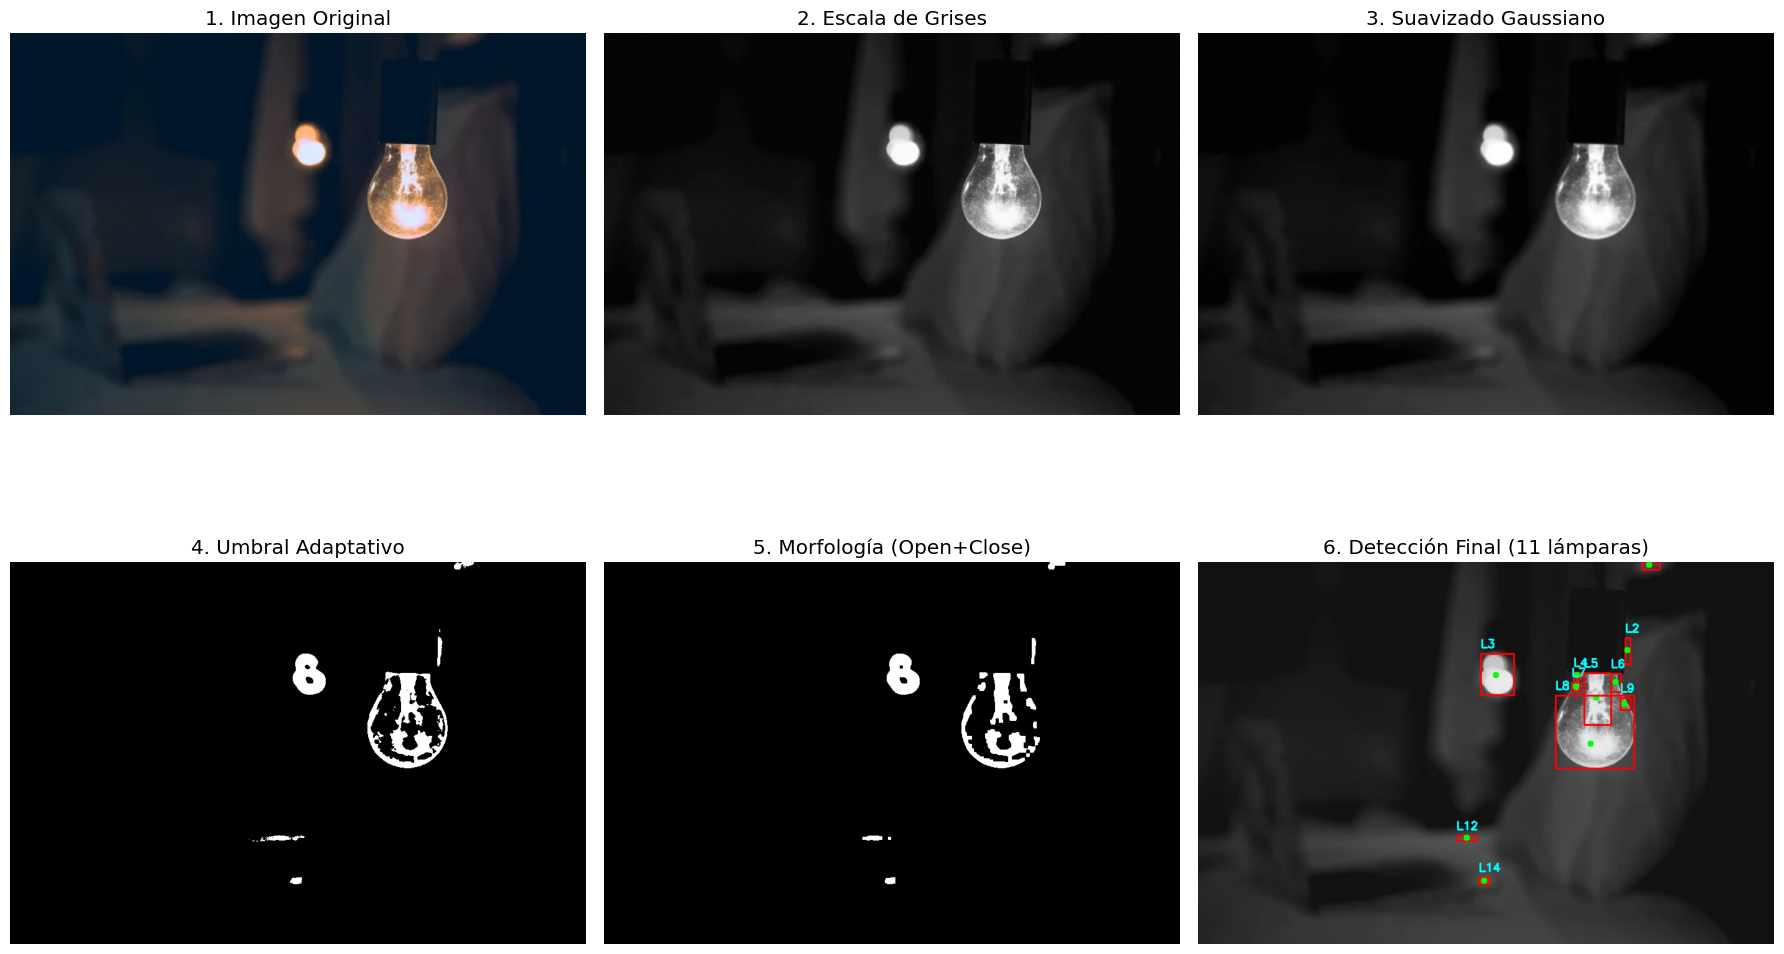

✅ Detectadas 11 lámparas:
   L1: Área=216, Perímetro=71.3, Centro=(724.8, 4.2)
   L2: Área=240, Perímetro=92.5, Centro=(689.2, 141.4)
   L3: Área=2429, Perímetro=264.0, Centro=(478.8, 181.2)
   L4: Área=113, Perímetro=39.1, Centro=(608.3, 181.1)
   L5: Área=1996, Perímetro=306.7, Centro=(639.3, 217.8)
   ... y 6 lámparas más

📸 Procesando imagen 2: ../image/2.png


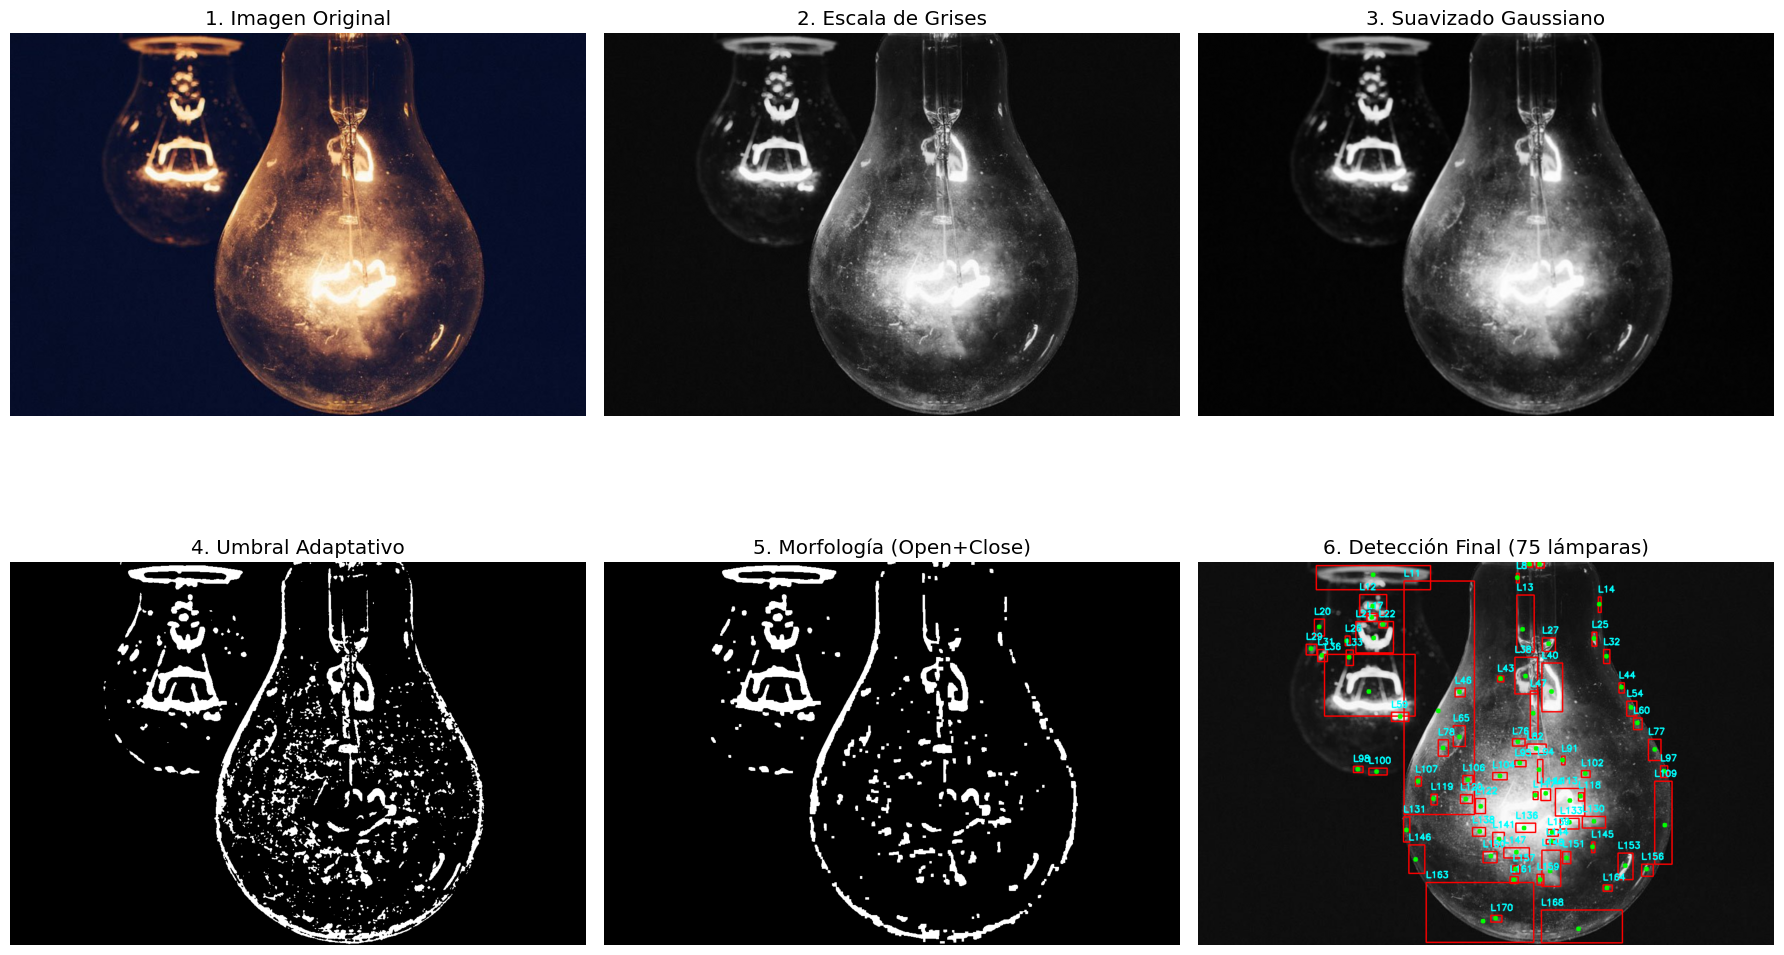

✅ Detectadas 75 lámparas:
   L2: Área=112, Perímetro=39.7, Centro=(687.6, 4.2)
   L3: Área=150, Perímetro=47.3, Centro=(708.6, 4.7)
   L5: Área=5470, Perímetro=915.5, Centro=(363.7, 26.3)
   L8: Área=110, Perímetro=46.8, Centro=(662.3, 32.2)
   L11: Área=5565, Perímetro=1127.8, Centro=(498.5, 308.7)
   ... y 70 lámparas más

📸 Procesando imagen 3: ../image/3.png


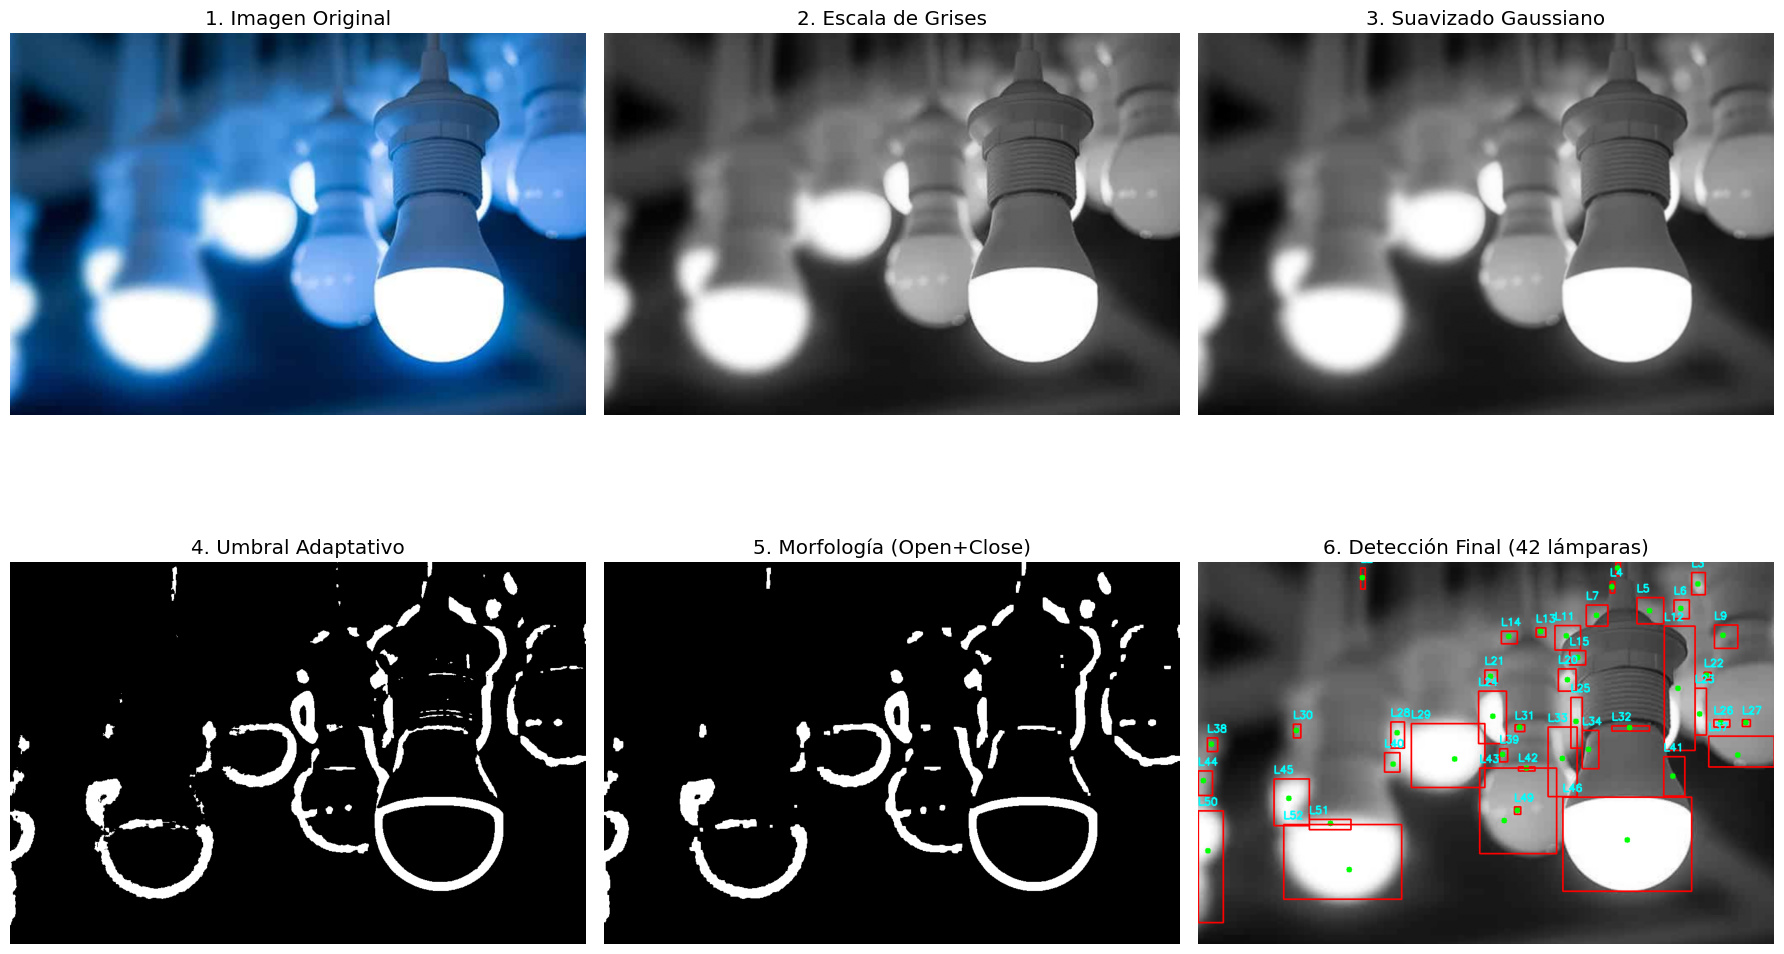

✅ Detectadas 42 lámparas:
   L1: Área=176, Perímetro=58.2, Centro=(736.2, 10.8)
   L2: Área=235, Perímetro=85.9, Centro=(288.2, 27.4)
   L3: Área=603, Perímetro=102.7, Centro=(877.4, 38.1)
   L4: Área=124, Perímetro=49.1, Centro=(726.2, 43.1)
   L5: Área=1023, Perímetro=152.7, Centro=(792.1, 85.6)
   ... y 37 lámparas más

📸 Procesando imagen 4: ../image/4.png


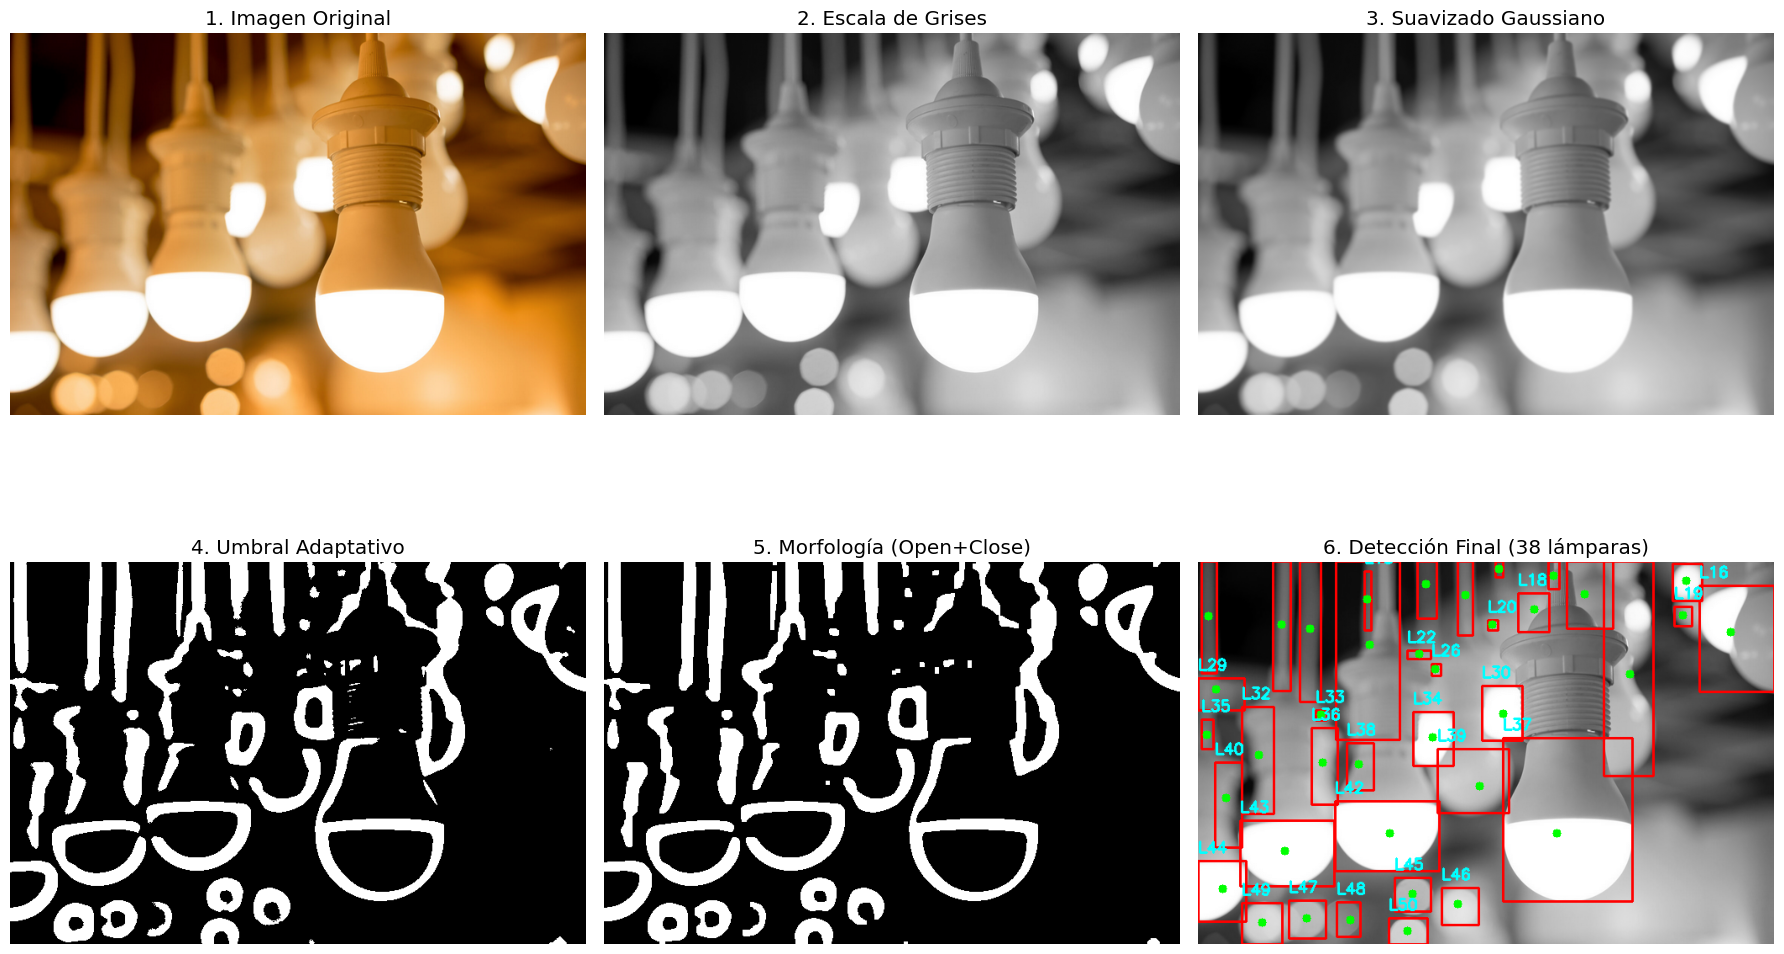

✅ Detectadas 38 lámparas:
   L1: Área=2010, Perímetro=289.2, Centro=(12.5, 65.3)
   L2: Área=2322, Perímetro=334.5, Centro=(99.7, 75.5)
   L3: Área=2837, Perímetro=367.8, Centro=(133.3, 80.5)
   L5: Área=3581, Perímetro=589.2, Centro=(204.5, 99.9)
   L6: Área=1147, Perímetro=168.0, Centro=(271.8, 27.4)
   ... y 33 lámparas más

🎯 RESUMEN: Pipeline principal completado para 4 imágenes


In [2]:
def detectar_lamparas_pipeline_principal(imagen_path, mostrar_pasos=True):
    """
    Pipeline principal optimizado para detección de lámparas
    """
    # 1. Cargar imagen
    img_color = cv2.imread(imagen_path)
    if img_color is None:
        return None, None
    
    # 2. Convertir a escala de grises
    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    
    # 3. Suavizado gaussiano (reducir ruido)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # 4. Umbral adaptativo (optimizado para regiones brillantes)
    binary = cv2.adaptiveThreshold(blurred, 255,
                                   cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY,
                                   35,  # tamaño del bloque
                                   -10) # constante de ajuste
    
    # 5. Operaciones morfológicas (refinamiento)
    kernel = np.ones((5, 5), np.uint8)
    morph = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)  # Eliminar ruido
    morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)  # Rellenar huecos
    
    # 6. Análisis de regiones
    labeled = label(morph)
    props = regionprops(labeled)
    
    # 7. Filtrar y visualizar resultados
    result = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    lamparas_detectadas = []
    
    for i, region in enumerate(props, 1):
        if region.area >= 100:  # Filtrar objetos pequeños
            y0, x0 = region.centroid
            minr, minc, maxr, maxc = region.bbox
            
            # Dibujar bounding box y centroide
            cv2.rectangle(result, (minc, minr), (maxc, maxr), (0, 0, 255), 2)
            cv2.circle(result, (int(x0), int(y0)), 5, (0, 255, 0), -1)
            cv2.putText(result, f'L{i}', (minc, minr-10), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
            
            lamparas_detectadas.append({
                'id': i,
                'area': region.area,
                'perimetro': region.perimeter,
                'centroide': (x0, y0)
            })
    
    if mostrar_pasos:
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        axes[0,0].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
        axes[0,0].set_title('1. Imagen Original')
        axes[0,0].axis('off')
        
        axes[0,1].imshow(gray, cmap='gray')
        axes[0,1].set_title('2. Escala de Grises')
        axes[0,1].axis('off')
        
        axes[0,2].imshow(blurred, cmap='gray')
        axes[0,2].set_title('3. Suavizado Gaussiano')
        axes[0,2].axis('off')
        
        axes[1,0].imshow(binary, cmap='gray')
        axes[1,0].set_title('4. Umbral Adaptativo')
        axes[1,0].axis('off')
        
        axes[1,1].imshow(morph, cmap='gray')
        axes[1,1].set_title('5. Morfología (Open+Close)')
        axes[1,1].axis('off')
        
        axes[1,2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        axes[1,2].set_title(f'6. Detección Final ({len(lamparas_detectadas)} lámparas)')
        axes[1,2].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    return result, lamparas_detectadas

# Ejecutar pipeline principal en todas las imágenes
print("🚀 EJECUTANDO PIPELINE PRINCIPAL DE DETECCIÓN\n")

resultados_principales = []
for i, path in enumerate(imagenes):
    print(f"📸 Procesando imagen {i+1}: {path}")
    resultado, lamparas = detectar_lamparas_pipeline_principal(path)
    
    if resultado is not None:
        resultados_principales.append((resultado, lamparas))
        
        # Guardar resultado
        cv2.imwrite(f'../image/resultados/demostracion/pipeline_principal_{i+1}.png', resultado)
        
        # Mostrar estadísticas
        print(f"✅ Detectadas {len(lamparas)} lámparas:")
        for lampara in lamparas[:5]:  # Mostrar solo las primeras 5
            print(f"   L{lampara['id']}: Área={lampara['area']:.0f}, "
                  f"Perímetro={lampara['perimetro']:.1f}, "
                  f"Centro=({lampara['centroide'][0]:.1f}, {lampara['centroide'][1]:.1f})")
        if len(lamparas) > 5:
            print(f"   ... y {len(lamparas)-5} lámparas más")
        print()

print(f"🎯 RESUMEN: Pipeline principal completado para {len(resultados_principales)} imágenes")